# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['INNHotelsGroup.csv']))

Saving INNHotelsGroup.csv to INNHotelsGroup.csv


In [ ]:
# Checking the shape of the data
data.shape

(36275, 19)



*   There are 36275 rows and 19 columns in the data.



In [ ]:
# Checking the first 5 rows of the data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
# Checking the first 5 rows of the data
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [ ]:
# Checking the info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   



*   There are 5 object type columns. 
    * Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status
* There is 1 float type column. 
    * avg_price_per_room
* There are 13 int type columns. 
    * no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, no_of_special_requests



In [ ]:
# Checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no null values in the dataset.

In [ ]:
# Checking for duplicated values
data.duplicated().sum()

0



*   There are no duplicate values in the dataset.



In [ ]:
# Checking for unique values 
data.Booking_ID.nunique()

36275

In [ ]:
# Dropping Booking_ID from the column
data = data.drop(["Booking_ID"], axis=1)

In [ ]:
# Checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# created histogram and violinplot function to repeat plotting process for EDA on variables 
def histogram_violinplot(data, column, figsize=(20,15), kde=False):

  plots, (sub_violin, sub_hist) = plt.subplots(
       nrows=2, 
       sharex=True,  
       gridspec_kw={"height_ratios": (0.25, 0.75)},
       figsize=figsize,
  )
  # setting style of background
  sns.set(style="darkgrid")
  # plotting a violin plot to show distribution
  sns.violinplot(
        data=data, x=column, kde=kde, ax=sub_violin, showmeans = True, palette="Blues"
  )
  # plotting a histogram to show distribution 
  sns.histplot(
        data=data, x=column, kde=kde, ax=sub_hist, palette ="Blues"
  )
  # puts line through the median of violinplot 
  sub_violin.axvline(
      data[column].median(), color = "purple", linestyle = "-"
  )
  # puts line through mean of histplot 
  sub_hist.axvline(
      data[column].median(), color = "purple", linestyle = "-"
  )
  # puts line through the median of violinplot 
  sub_violin.axvline(
       data[column].mean(), color = "red", linestyle = "--"
  )
  # puts line through mean of histplot 
  sub_hist.axvline(
       data[column].mean(), color = "red", linestyle = "--"
  )

In [ ]:
def percentage_barplot(data, column, figsize=(40,10)):
  percentage_counts = data[column].value_counts(normalize = True)
  fig, ax = plt.subplots(figsize=(40,10))
  ax.bar(percentage_counts.index, 
         percentage_counts, 
         color = ['blue', 'royalblue', 'dodgerblue', 'deepskyblue',
                  'cyan', 'aquamarine', 'springgreen', 'lime', 'forestgreen', 'lightgreen',
                  'yellow', 'gold', 'orange', 'peru', 'coral', 'lightcoral', 
                  'lightgrey', 'black'])
  
  counts = data[column].value_counts()
  new_df = pd.concat([counts, percentage_counts], axis = 1)
  new_df = new_df.set_axis(["Counts", "Percentage"], axis = 1 )
  return new_df

### Number of Adults 

count   36275.00000
mean        1.84496
std         0.51871
min         0.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         4.00000
Name: no_of_adults, dtype: float64


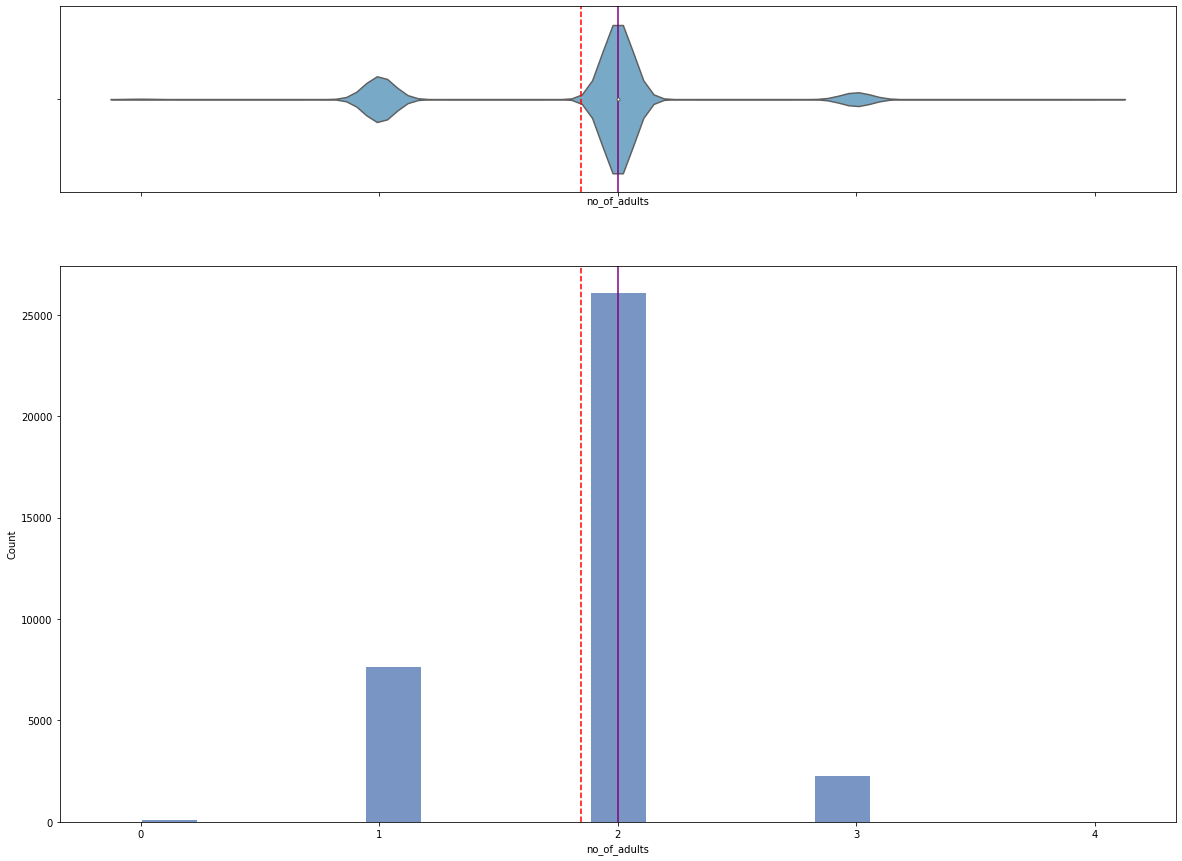

In [ ]:
# Checking observations on number of adults
histogram_violinplot(data, 'no_of_adults')
print(data['no_of_adults'].describe())  



*   The median number of adults for a booking is 2.



### Number of Children 

count   36275.00000
mean        0.10528
std         0.40265
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        10.00000
Name: no_of_children, dtype: float64


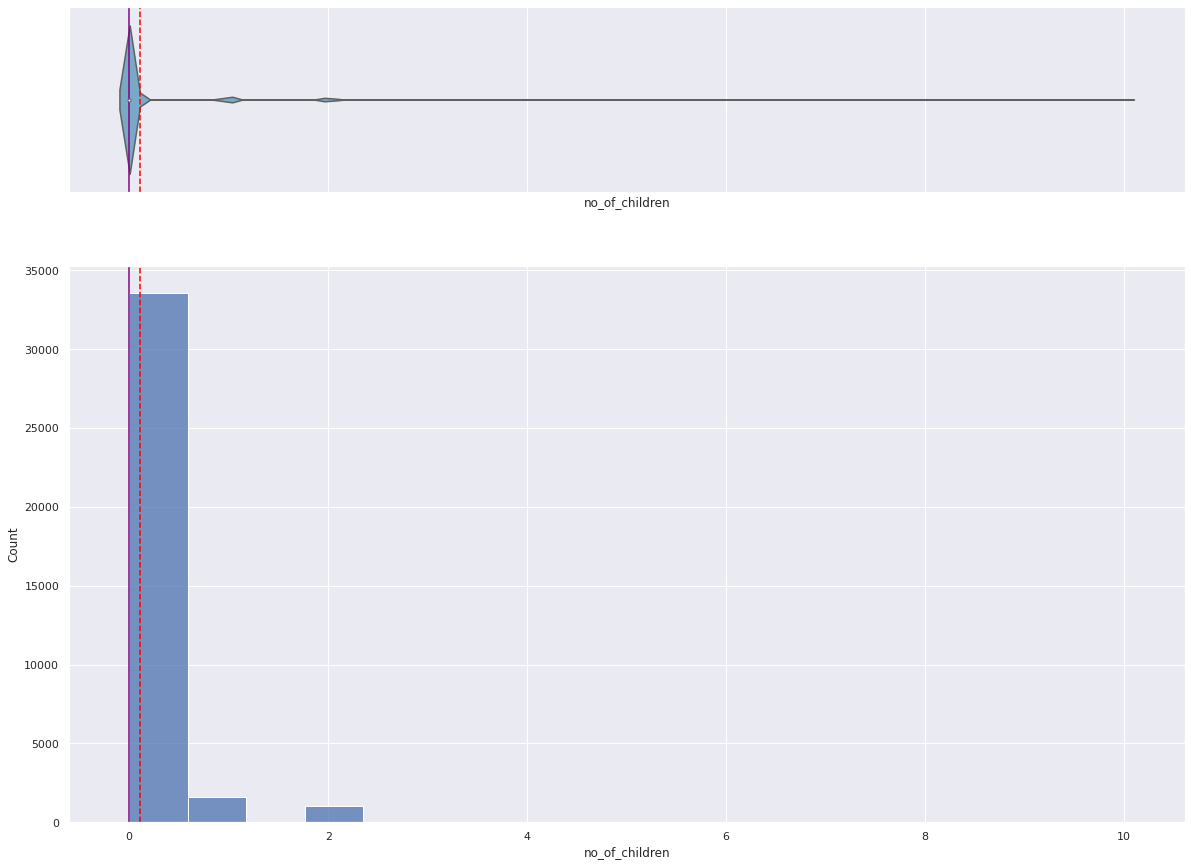

In [ ]:
# Checking observations on number of children
histogram_violinplot(data, 'no_of_children')
print(data['no_of_children'].describe())  



*   The majority of bookings don't have children.



In [ ]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

### Number of Weekend Nights

count   36275.00000
mean        0.81072
std         0.87064
min         0.00000
25%         0.00000
50%         1.00000
75%         2.00000
max         7.00000
Name: no_of_weekend_nights, dtype: float64


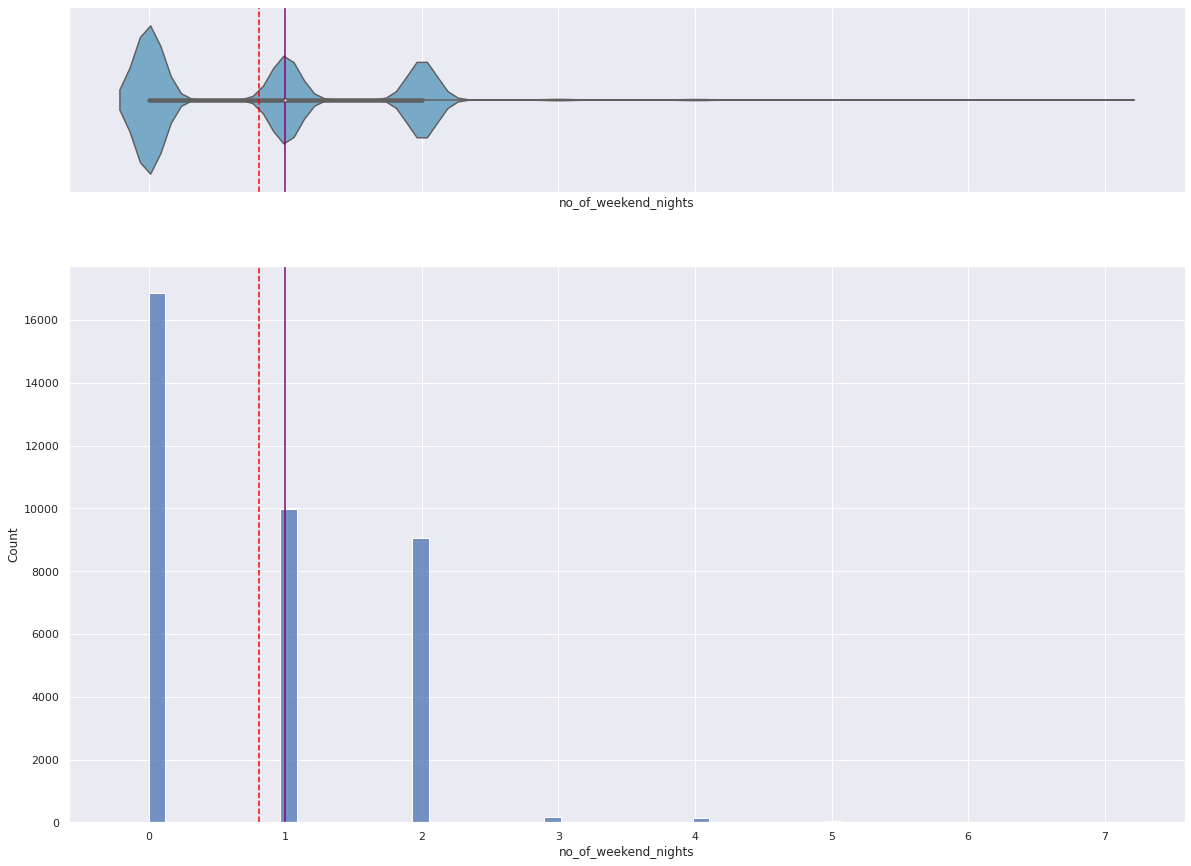

In [ ]:
# Checking observations on number of weekend nights
histogram_violinplot(data, 'no_of_weekend_nights')
print(data['no_of_weekend_nights'].describe())  



*   The median number of weekend nights the guest stayed or booked to stay at was 1. 



### Number of Week Nights

count   36275.00000
mean        2.20430
std         1.41090
min         0.00000
25%         1.00000
50%         2.00000
75%         3.00000
max        17.00000
Name: no_of_week_nights, dtype: float64


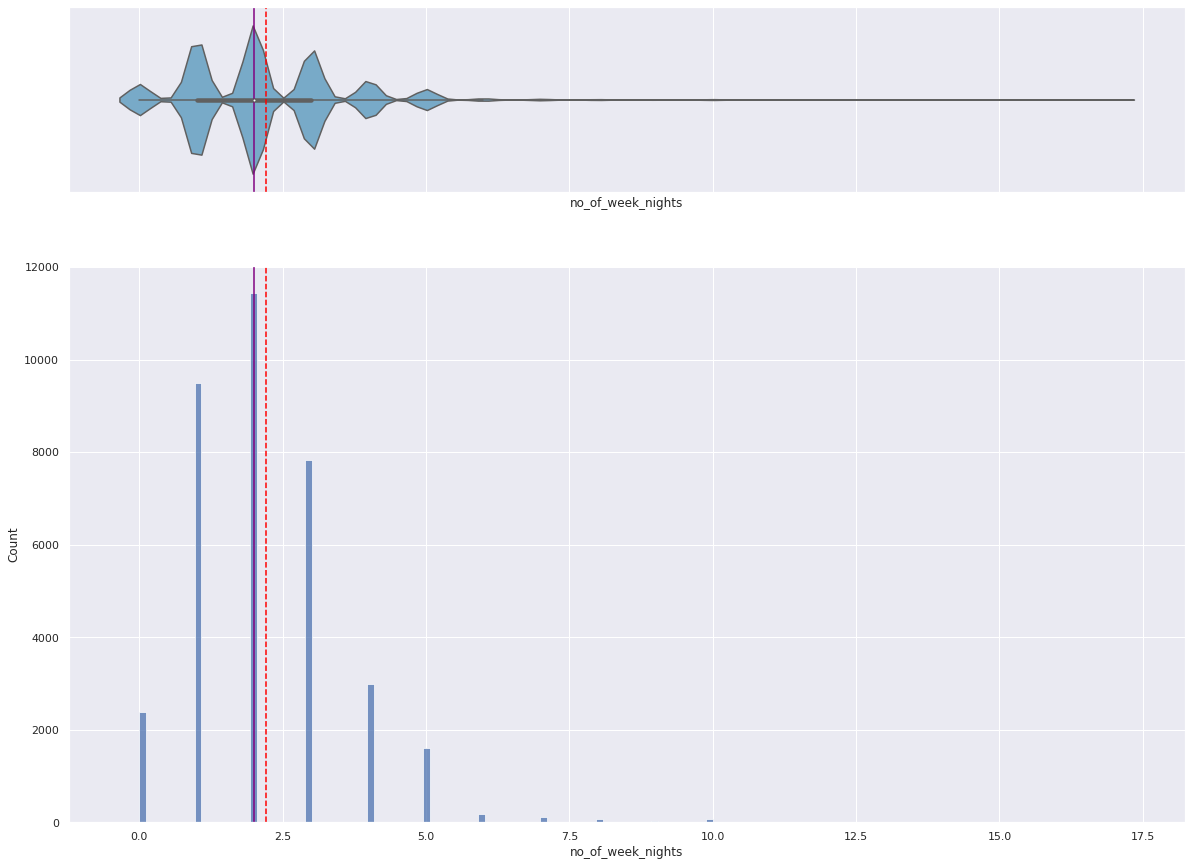

In [ ]:
# Checking observations on number of week nights
histogram_violinplot(data, 'no_of_week_nights')
print(data['no_of_week_nights'].describe())  



*   The median number of week nights is 2 for either staying or booking at the hotel.



### Lead Time

count   36275.00000
mean       85.23256
std        85.93082
min         0.00000
25%        17.00000
50%        57.00000
75%       126.00000
max       443.00000
Name: lead_time, dtype: float64


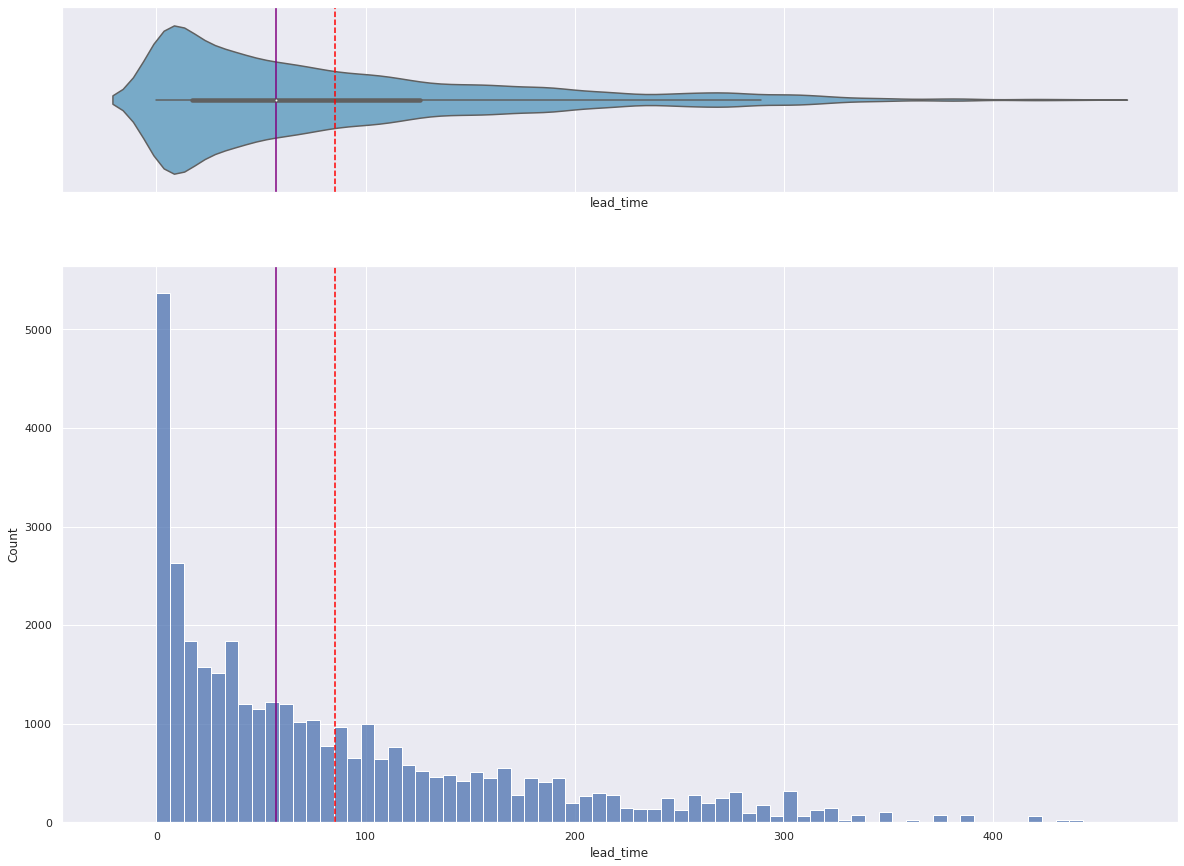

In [ ]:
# Checking observations on lead time
histogram_violinplot(data, 'lead_time')
print(data['lead_time'].describe())  



*   The average number of days between the date of booking and the arrival date was 85.2 days.

### Average Price per Room

count   36275.00000
mean      103.42354
std        35.08942
min         0.00000
25%        80.30000
50%        99.45000
75%       120.00000
max       540.00000
Name: avg_price_per_room, dtype: float64


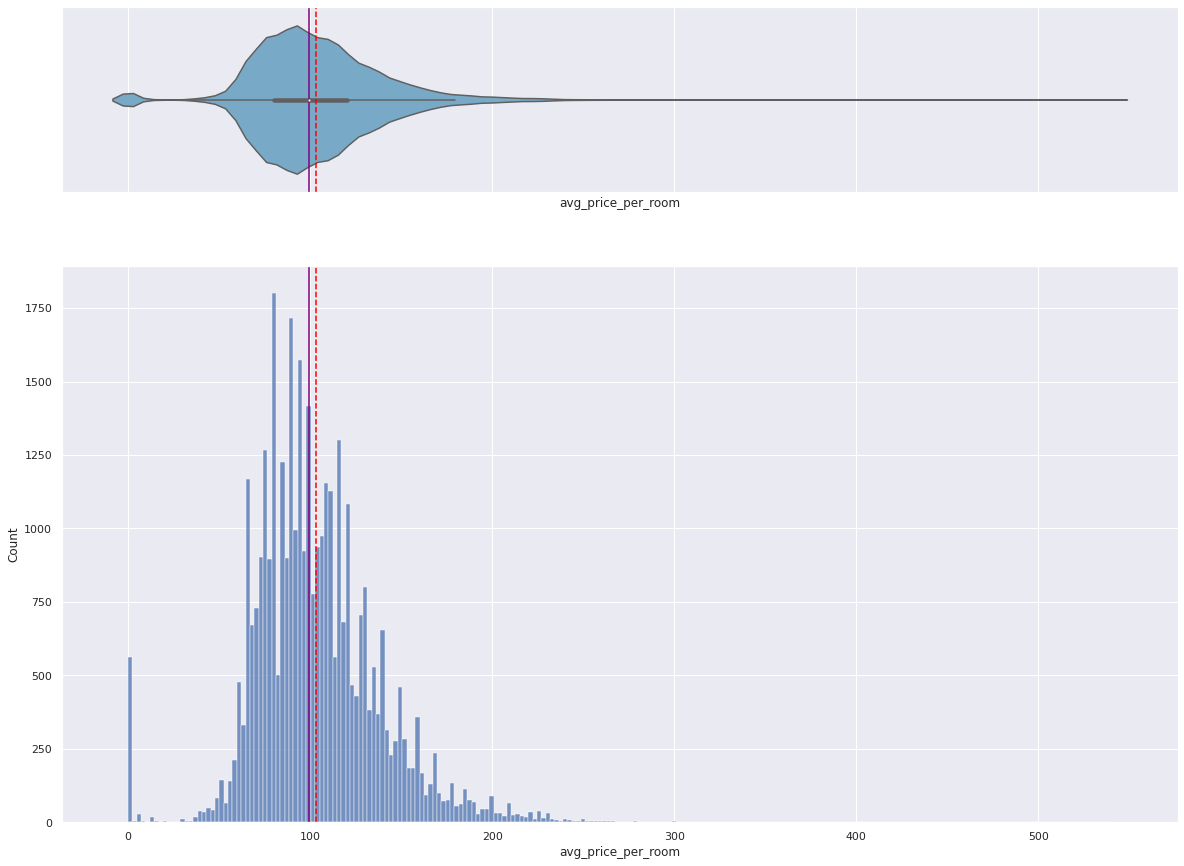

In [ ]:
# Checking observations on average price per room
histogram_violinplot(data, 'avg_price_per_room')
print(data['avg_price_per_room'].describe())  



*   The average price per room is 103.42 euros with the median being 99.45. The standard deviation is 35.08 euros. 


In [ ]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [ ]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [ ]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

### Number of Previous Booking Cancellations

count   36275.00000
mean        0.02335
std         0.36833
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        13.00000
Name: no_of_previous_cancellations, dtype: float64


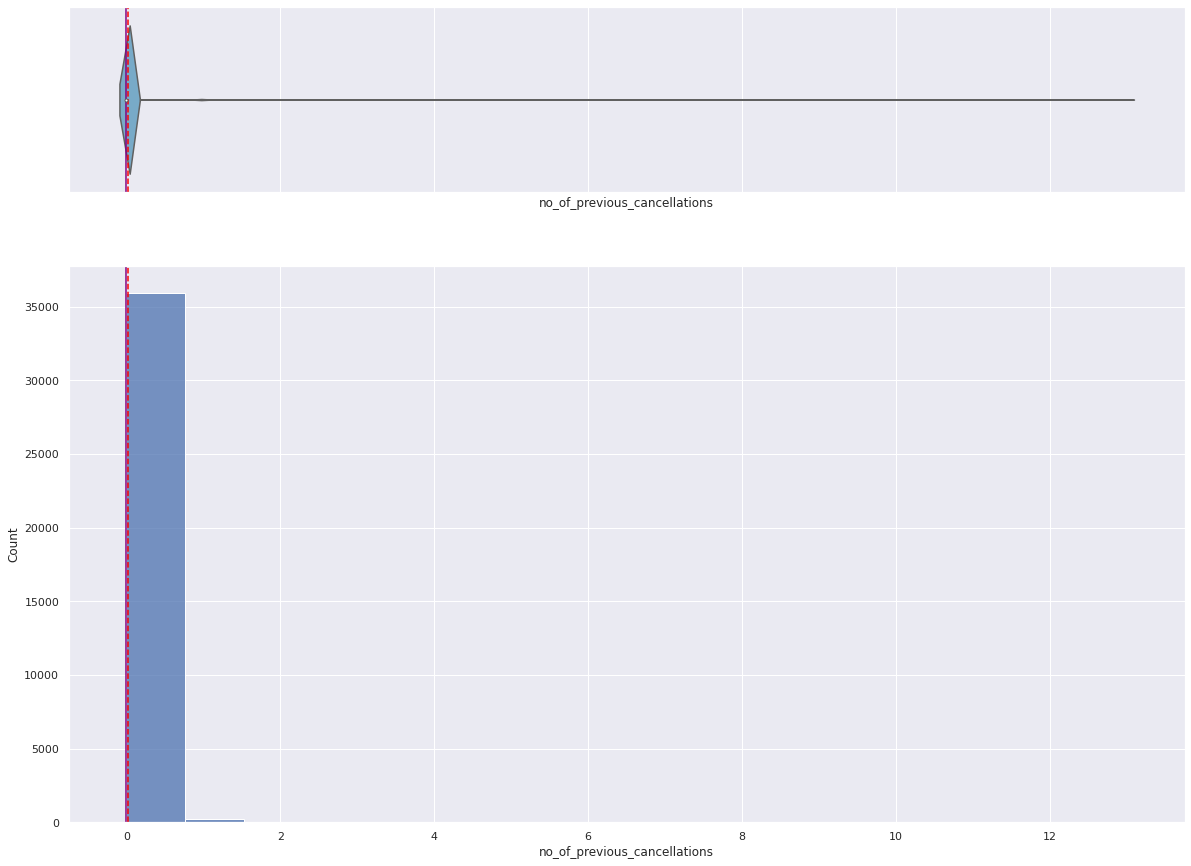

In [ ]:
# Checking observations on number of previous booking cancellations
histogram_violinplot(data, 'no_of_previous_cancellations')
print(data['no_of_previous_cancellations'].describe())  



*   The standard deviation for the number of booking cancellations is 0.36.


### Number of Previous Bookings Not Cancelled

count   36275.00000
mean        0.15341
std         1.75417
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        58.00000
Name: no_of_previous_bookings_not_canceled, dtype: float64


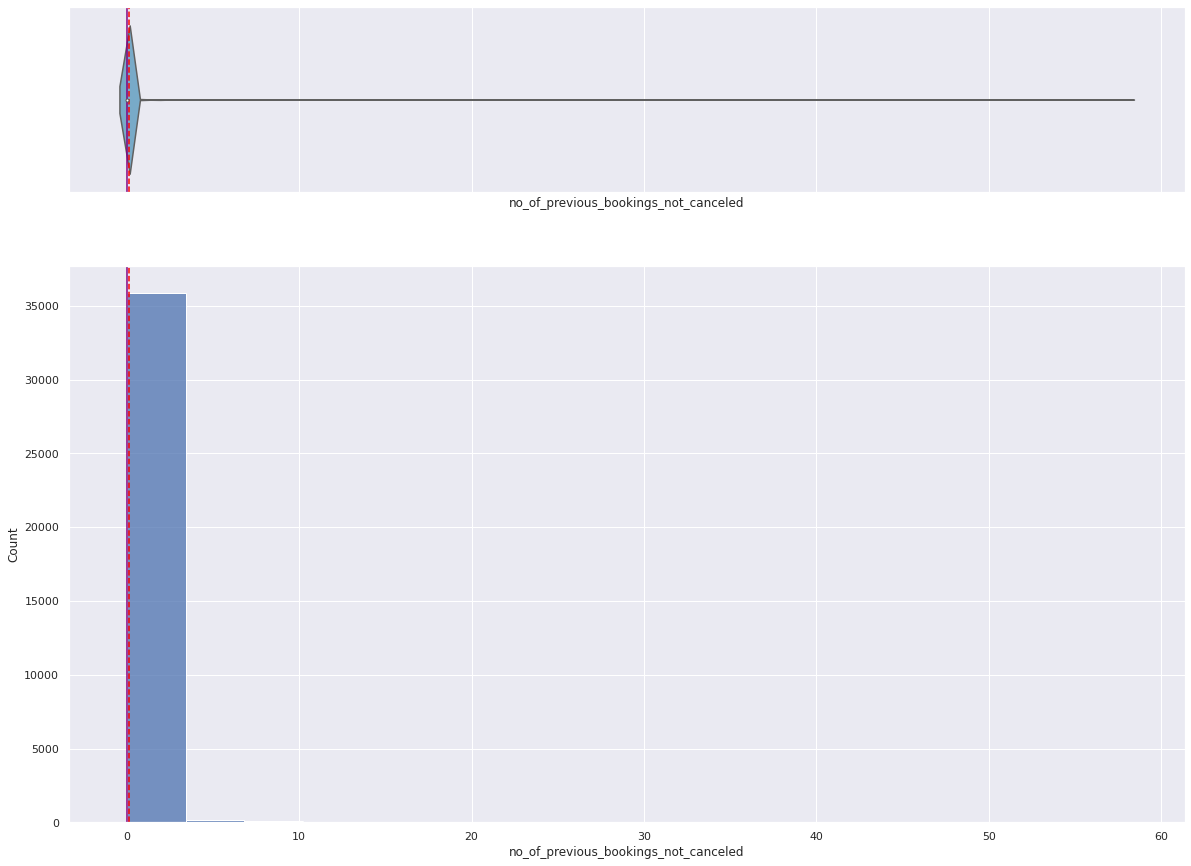

In [ ]:
# Checking observations on number of previous bookings not cancelled
histogram_violinplot(data, 'no_of_previous_bookings_not_canceled')
print(data['no_of_previous_bookings_not_canceled'].describe())  



*   The standard deviation for the number of previous bookings not canceled is 1.75.


### Required Car Parking Space

,Counts,Percentage
0,35151,0.96901
1,1124,0.03099


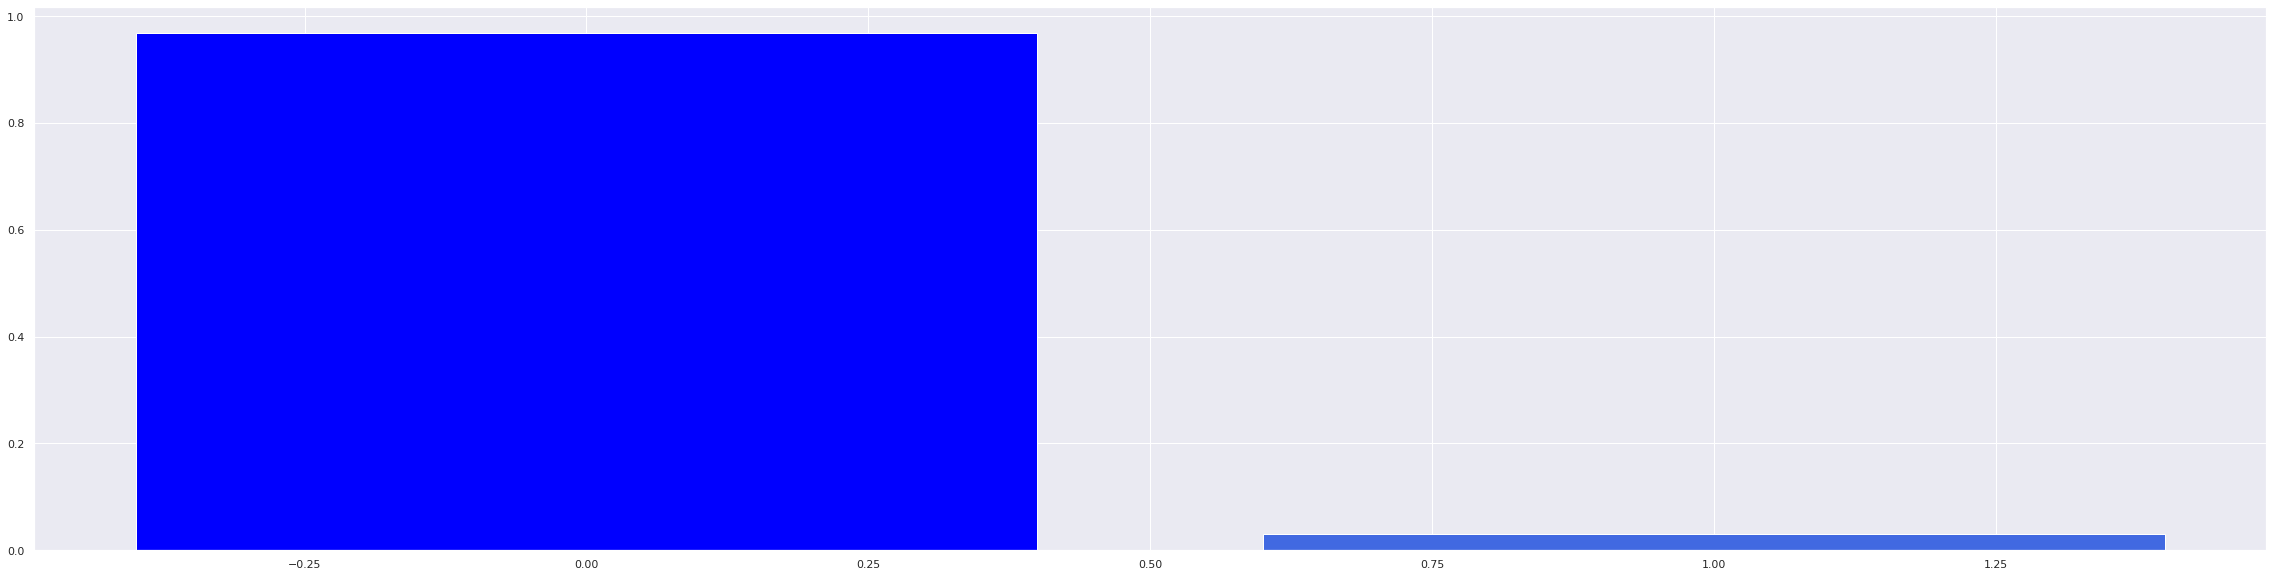

In [ ]:
# Checking observations on required car parking space 
percentage_barplot(data, 'required_car_parking_space')



*   About 96.9% of the customers do not require car parking spaces.   


### Type of Meal Plan

,Counts,Percentage
Meal Plan 1,27835,0.76733
Not Selected,5130,0.14142
Meal Plan 2,3305,0.09111
Meal Plan 3,5,0.00014


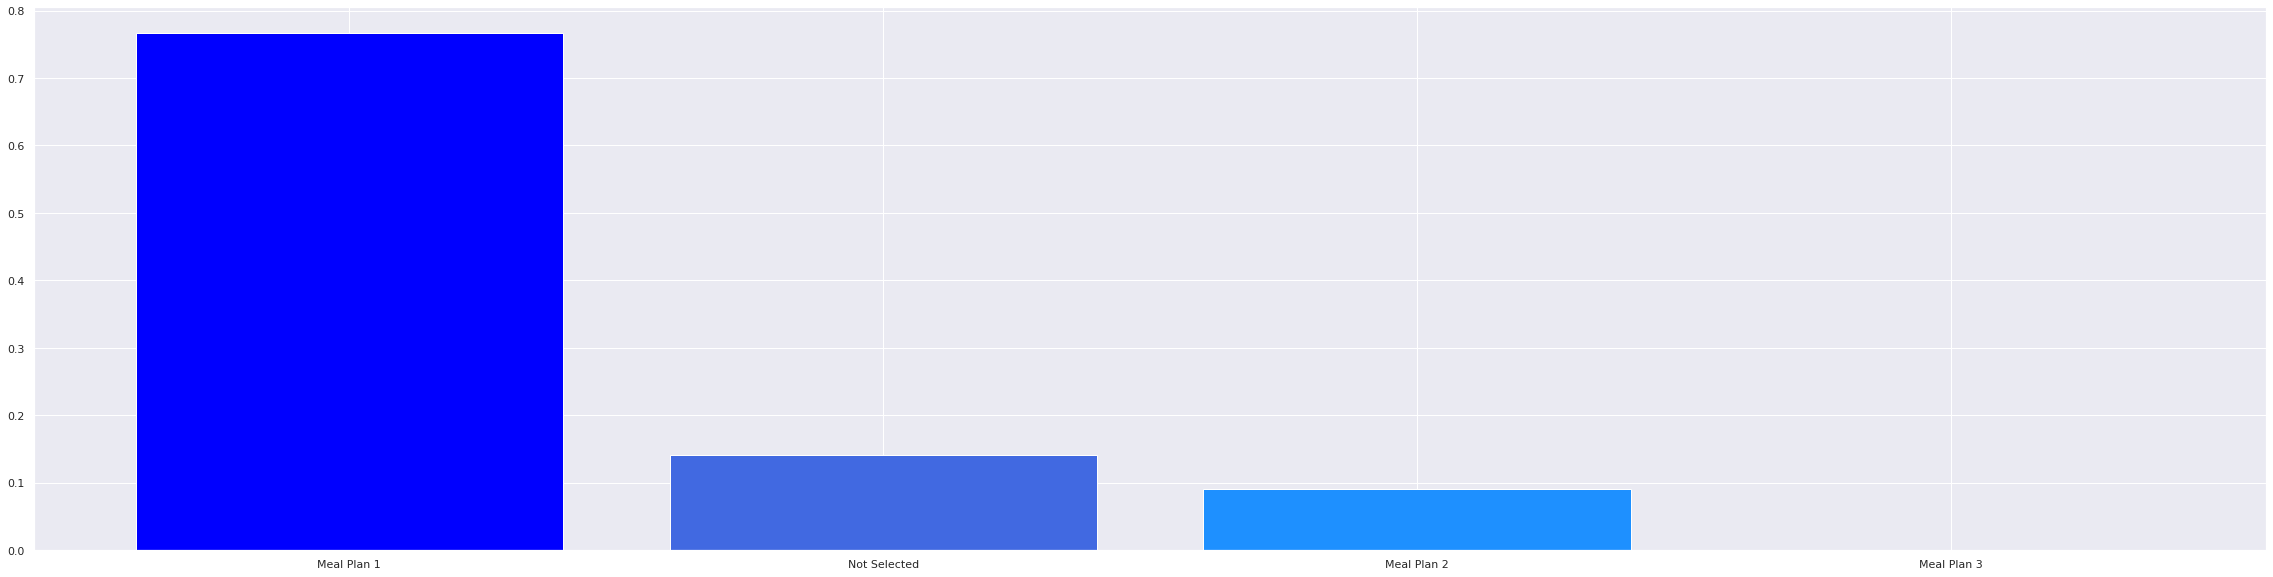

In [ ]:
# Checking observations on type of meal plan
percentage_barplot(data, 'type_of_meal_plan')



*   About 76.7% of customers chose meal plan 1 and 14% did not select.

### Arrival Month

,Counts,Percentage
10,5317,0.14657
9,4611,0.12711
8,3813,0.10511
6,3203,0.08830
12,3021,0.08328
11,2980,0.08215
7,2920,0.08050
4,2736,0.07542
5,2598,0.07162
3,2358,0.06500


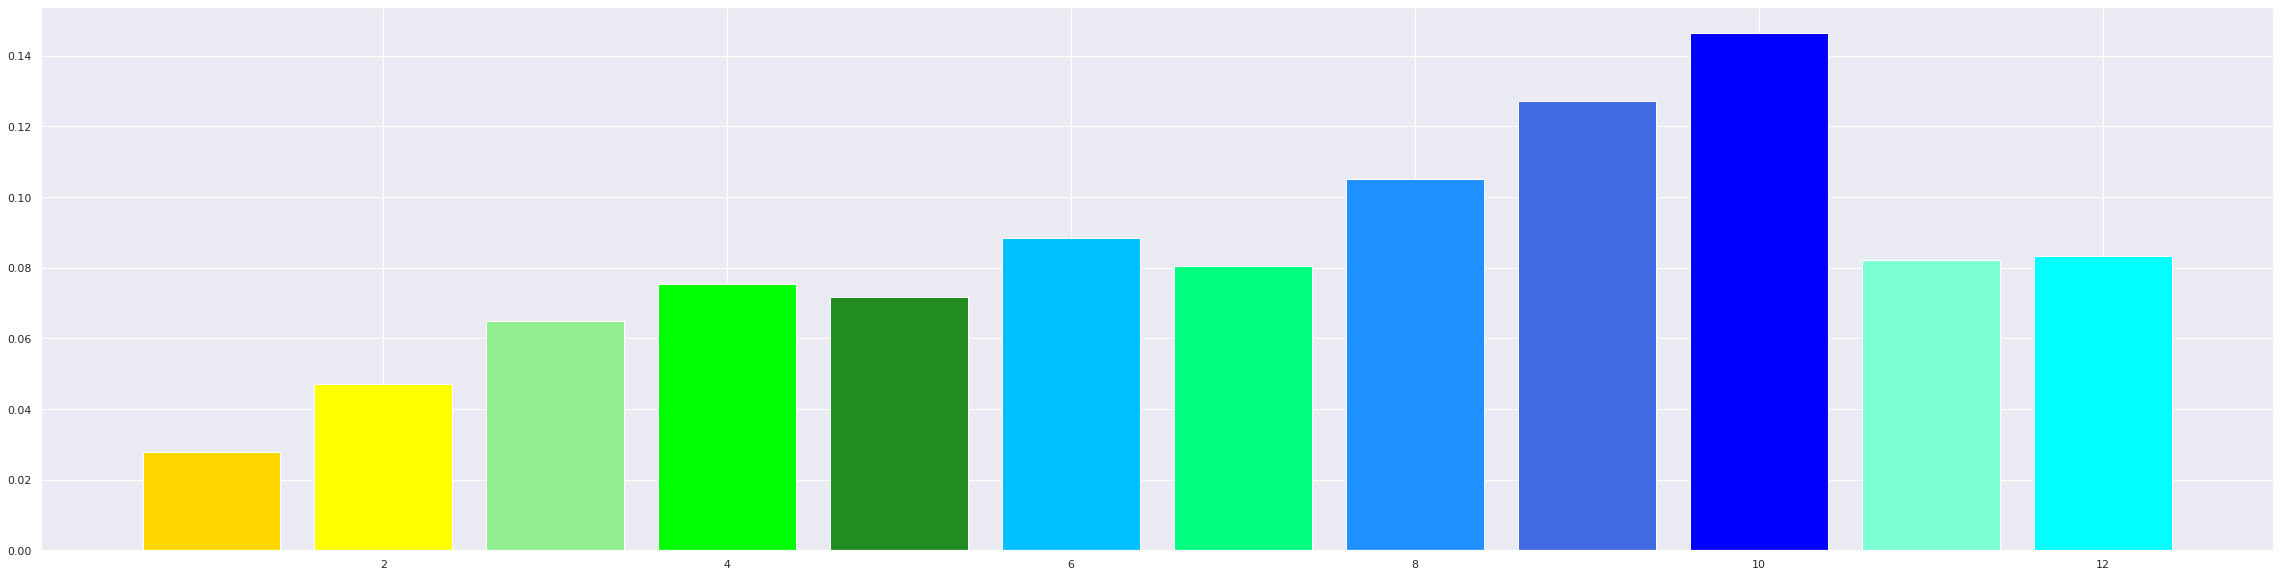

In [ ]:
# Checking observations on arrival month
percentage_barplot(data, 'arrival_month')



*   About 14.6% of customers arrive in October which is followed by 12.7% for September.

### Market Segment Type

,Counts,Percentage
Online,23214,0.63994
Offline,10528,0.29023
Corporate,2017,0.05560
Complementary,391,0.01078
Aviation,125,0.00345


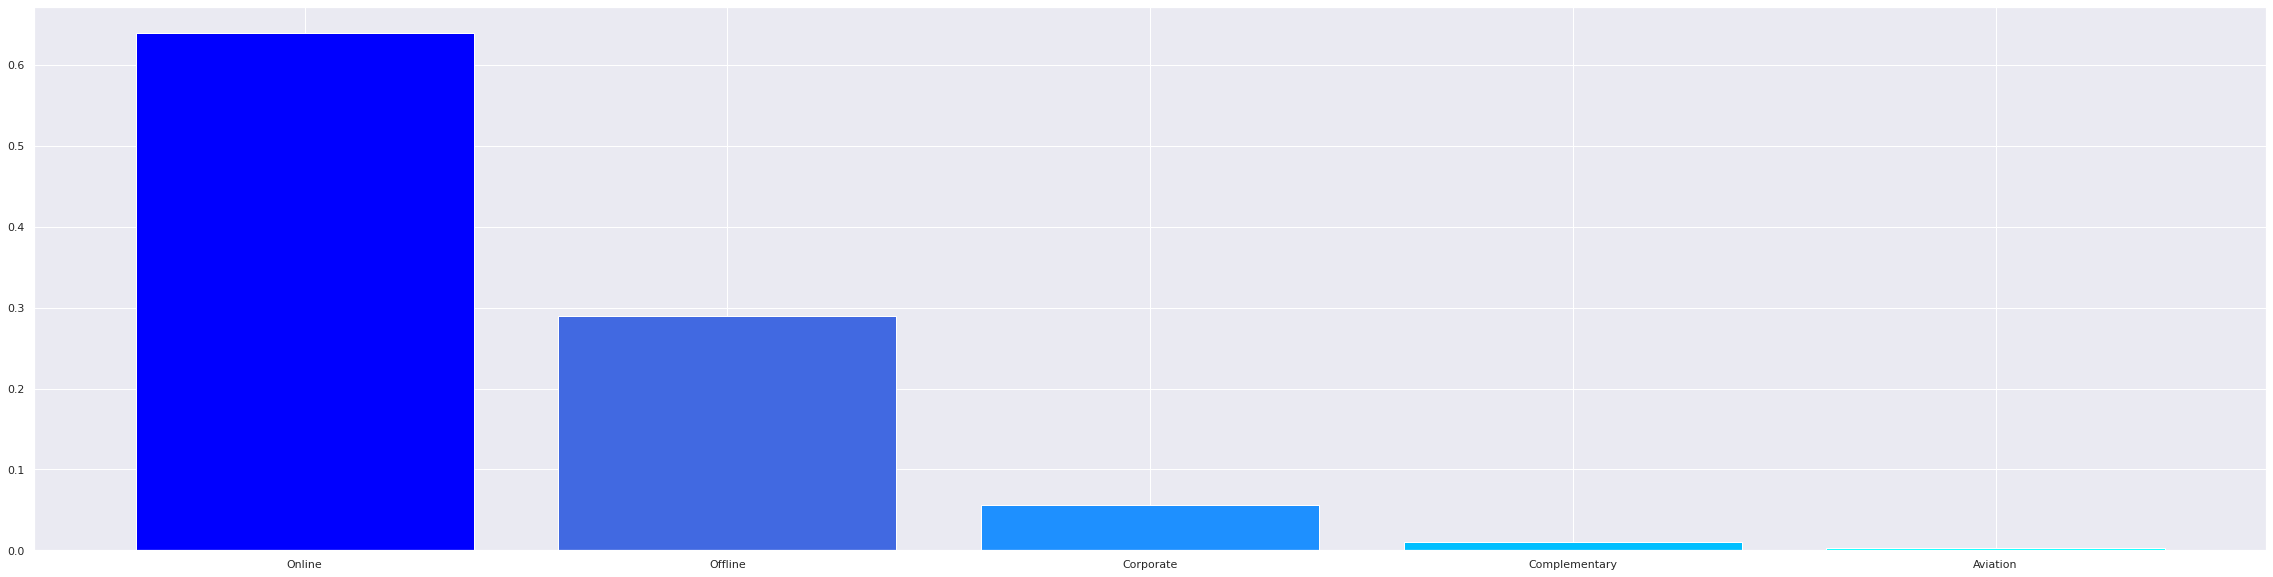

In [ ]:
# Checking observations on market segment type
percentage_barplot(data, 'market_segment_type')



*   About 63.39% of the market is from online and about 29% is from offline.

### Number of Special Requests

,Counts,Percentage
0,19777,0.54520
1,11373,0.31352
2,4364,0.12030
3,675,0.01861
4,78,0.00215
5,8,0.00022


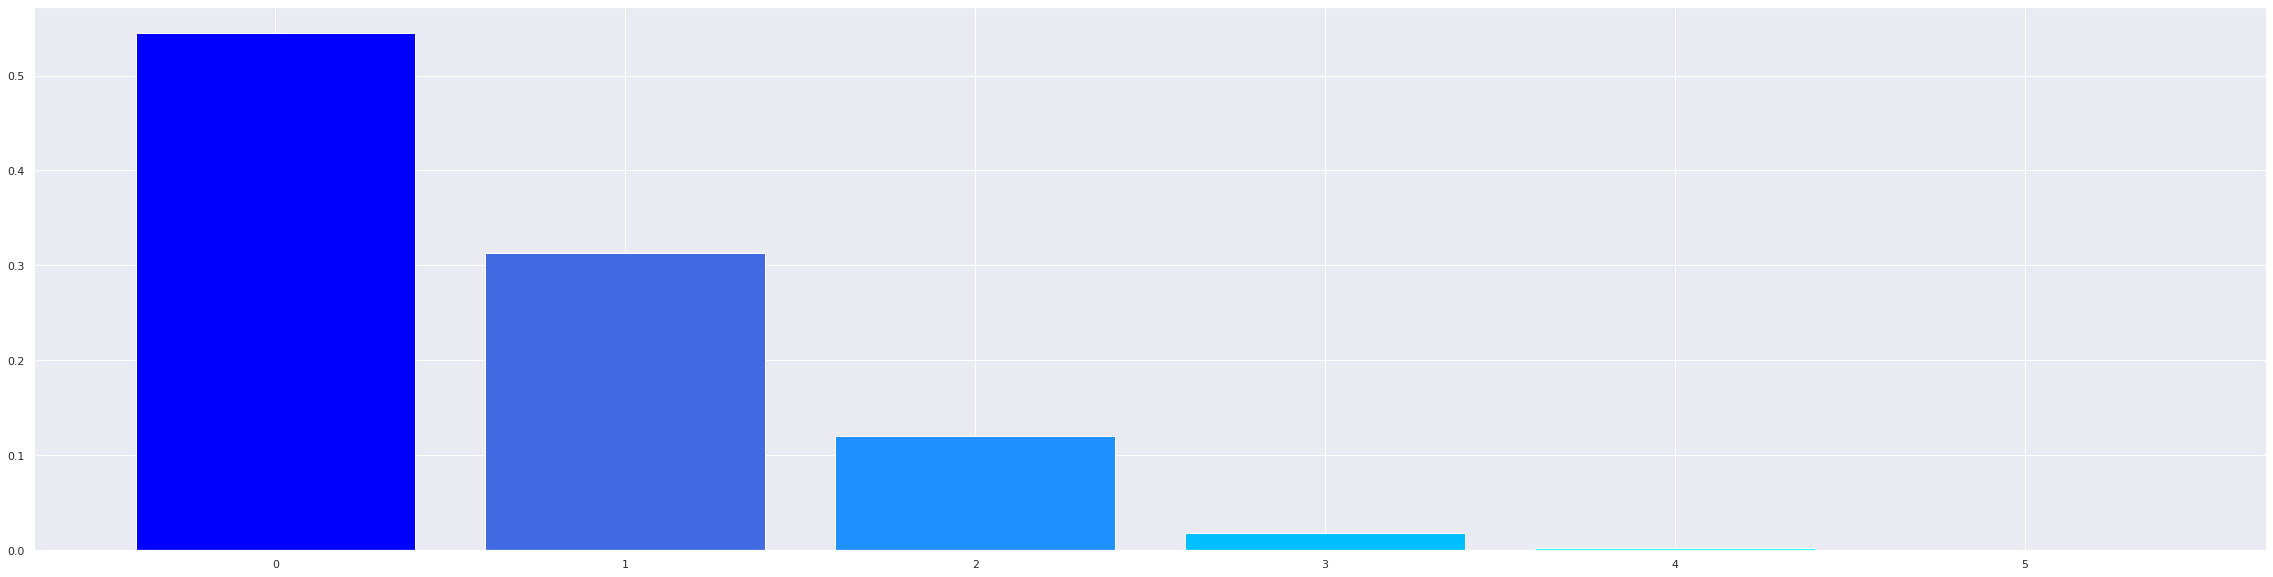

In [ ]:
# Checking observations on number of special requests
percentage_barplot(data, 'no_of_special_requests')



*   About 54.5% of customers do not make a special request. 31.3% make 1 special request which is followed by 12% making 2 special requests.



### Booking Status 

,Counts,Percentage
Not_Canceled,24390,0.67236
Canceled,11885,0.32764


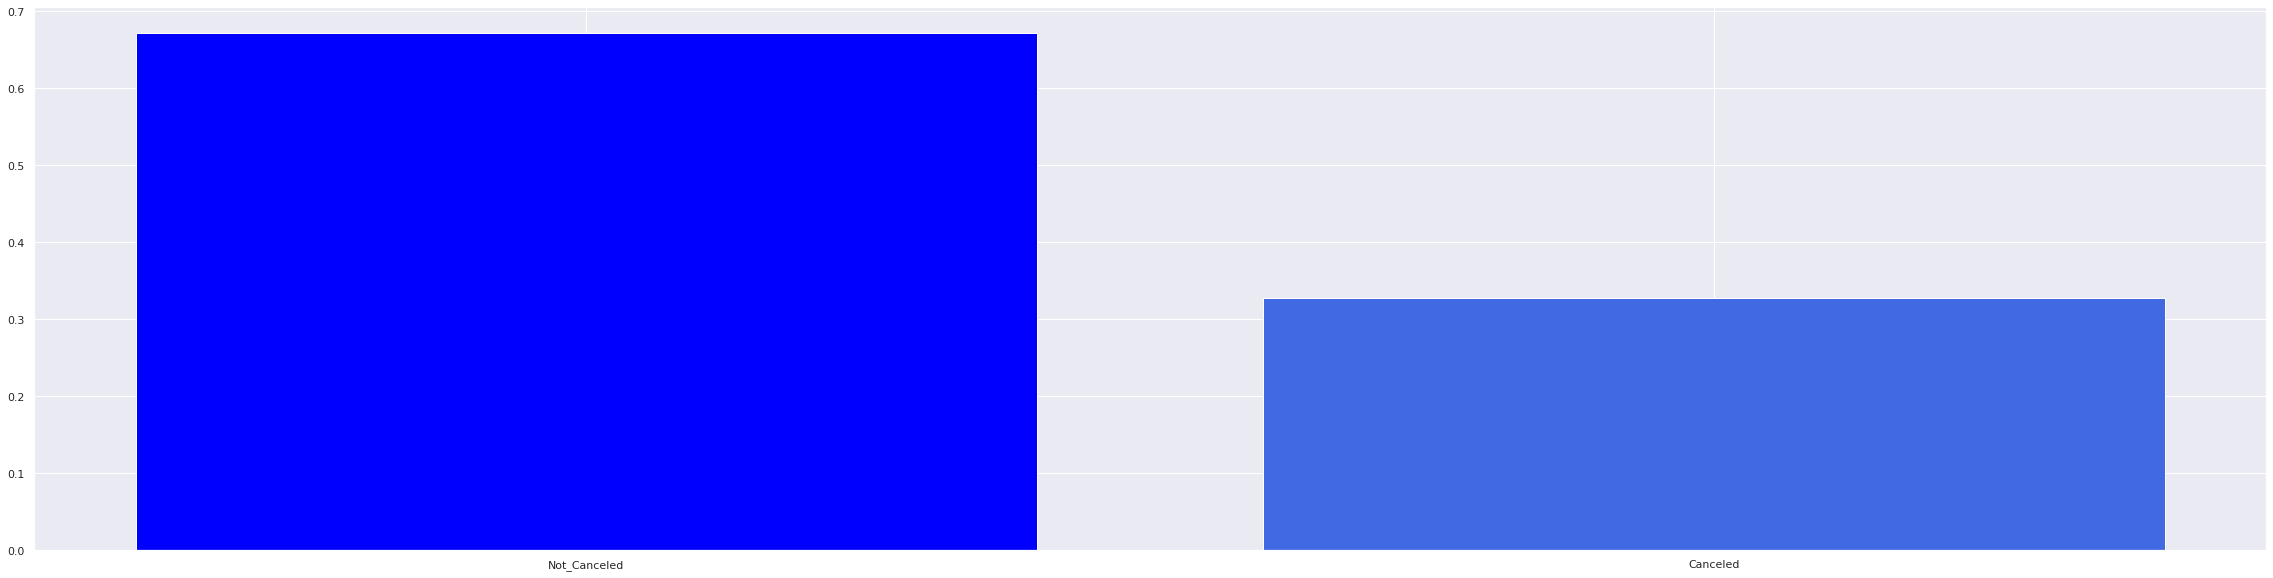

In [ ]:
# Checking observations on booking status
percentage_barplot(data, 'booking_status')



*   About 67.2% of bookings are not canceled whereas 32.7% of bookings are canceled.



In [ ]:
# Changing status to 1 if canceled and 0 if not canceled
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?



1. The busiest months are October and September.
2. Most of the guests come from Online market segment.
4. 32% of bookings are canceled.



### Room Prices in Different Market Segments 

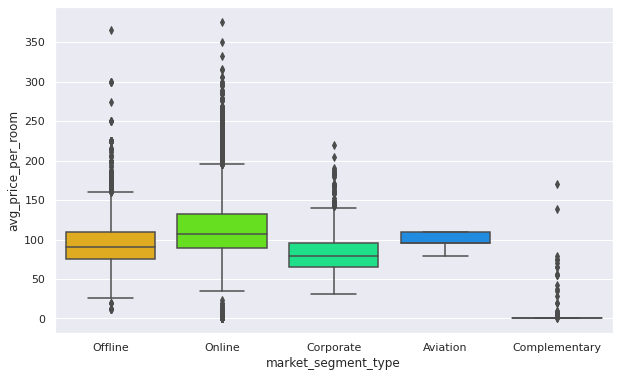

market_segment_type
Aviation        100.70400
Complementary     3.14176
Corporate        82.91174
Offline          91.59844
Online          112.25685
Name: avg_price_per_room, dtype: float64

In [ ]:
# Checking observations on room prices for market segments
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()
data.groupby(['market_segment_type'])['avg_price_per_room'].mean()



*   The average price per room for online is 112.25 and 91.59 for offline.


### Booking Status in Different Market Segments 

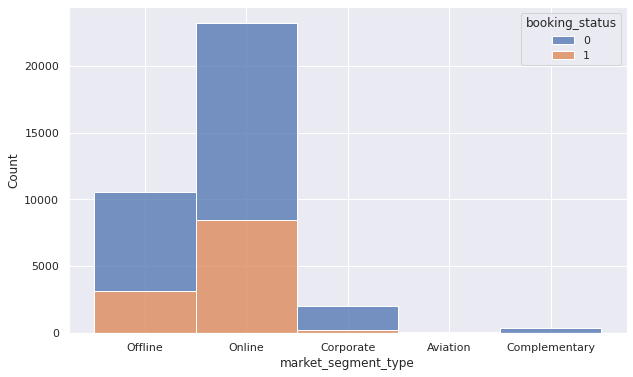

market_segment_type  booking_status
Aviation             0                    88
                     1                    37
Complementary        0                   391
Corporate            0                  1797
                     1                   220
Offline              0                  7375
                     1                  3153
Online               0                 14739
                     1                  8475
Name: booking_status, dtype: int64

In [ ]:
# Checking observations on booking status for market segments
plt.figure(figsize=(10, 6))
sns.histplot(binwidth=0.5, x="market_segment_type", hue="booking_status", data=data, stat="count", multiple="stack")
plt.show()
data.groupby(['market_segment_type'])['booking_status'].value_counts()



*   For online, there are 14739 that do not cancel and 8475 that do cancel. For offline, there are 7375 that do not cancel and 3153 that do cancel.


### Number of Special Requests and Booking Status

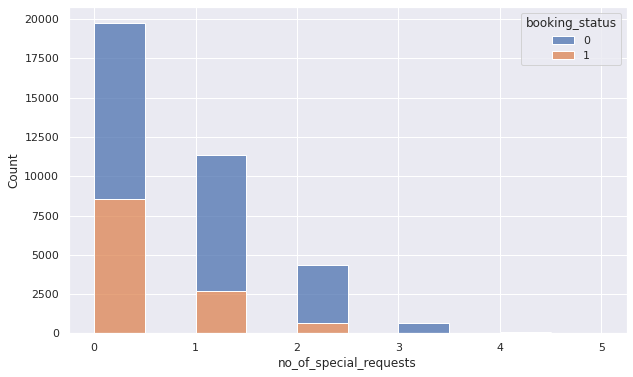

no_of_special_requests  booking_status
0                       0                 11232
                        1                  8545
1                       0                  8670
                        1                  2703
2                       0                  3727
                        1                   637
3                       0                   675
4                       0                    78
5                       0                     8
Name: booking_status, dtype: int64

In [ ]:
# Checking observations on number of special requests and booking status
plt.figure(figsize=(10, 6))
sns.histplot(binwidth=0.5, x="no_of_special_requests", hue="booking_status", data=data, stat="count", multiple="stack")
plt.show()
data.groupby(['no_of_special_requests'])['booking_status'].value_counts()



* As the number of requests increase, it seems that the booking status of cancelled decreases.



### Number of Special Requests and Average Room Price

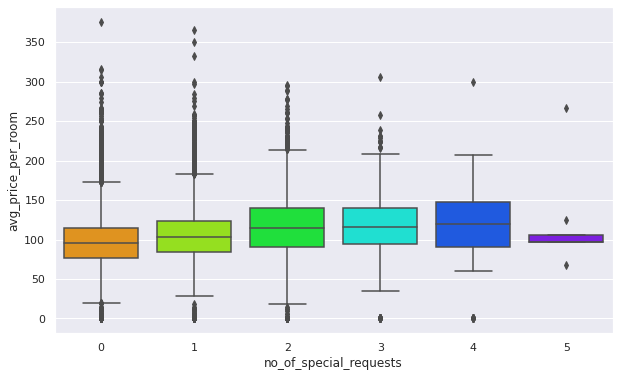

,count,mean,std,min,25%,50%,75%,max
no_of_special_requests,,,,,,,,
0,19777.00000,98.42248,32.84500,0.00000,76.67000,95.00000,115.00000,375.50000
1,11373.00000,105.53395,34.40269,0.00000,84.33000,103.00000,123.80000,365.00000
2,4364.00000,118.05876,39.04902,0.00000,90.41750,114.40000,140.06250,296.00000
3,675.00000,118.29699,40.46031,0.00000,93.80000,116.10000,140.00000,306.00000
4,78.00000,110.07103,58.90582,0.00000,90.37500,120.00000,147.73750,300.00000
5,8.00000,118.12500,61.90964,68.07000,96.30000,96.60000,106.01000,266.67000


In [ ]:
# Checking observations on room prices for number of special requests
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()
data.groupby(['no_of_special_requests'])['avg_price_per_room'].describe()



*   As the number of special requests increase, it seems that the average price for the room increase.


### Average Room Price and Booking Status 

<Figure size 720x432 with 0 Axes>

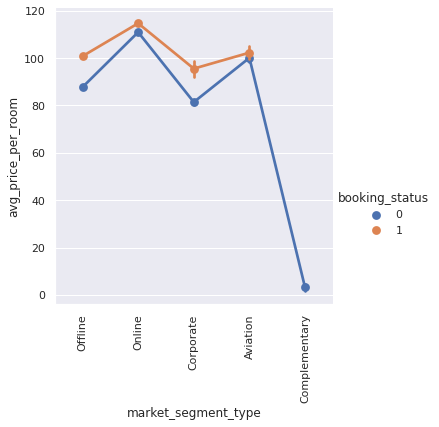

In [ ]:
# Checking observations on room prices for number for market segments grouped by booking status 
plt.figure(figsize=(10, 6))
sns.catplot(data=data, x = 'market_segment_type', y = 'avg_price_per_room', hue ='booking_status', kind = 'point')
plt.xticks(rotation = 90)
plt.show()



*   For all the market segments, the average price per room is higher for booking status with cancelations.


### AArrival Month and Average Price Per Room

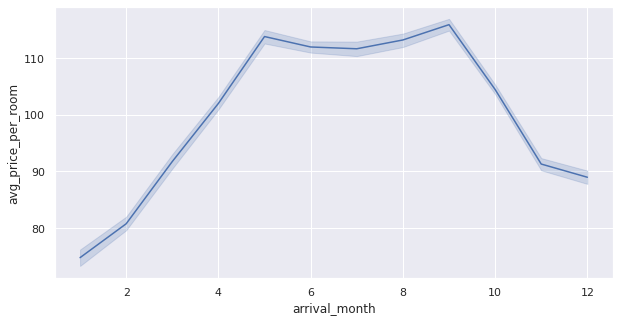

,count,mean,std,min,25%,50%,75%,max
arrival_month,,,,,,,,
1,1014.00000,74.74976,23.19334,0.00000,66.00000,76.59500,85.37500,194.67000
2,1704.00000,80.73364,25.04328,0.00000,67.50000,79.00000,88.00000,230.00000
3,2358.00000,91.73084,31.77163,0.00000,72.62250,85.50000,105.95000,254.00000
4,2736.00000,101.99880,30.22850,0.00000,84.00000,96.30000,115.00000,260.50000
5,2598.00000,113.81068,33.55530,0.00000,95.00000,110.00000,132.60000,296.00000
6,3203.00000,111.96650,28.50186,0.00000,95.00000,115.00000,126.90000,332.57000
7,2920.00000,111.64932,35.75551,0.00000,90.00000,106.00000,131.70000,365.00000
8,3813.00000,113.20398,37.00895,0.00000,90.90000,108.30000,135.90000,316.00000
9,4611.00000,115.90692,37.87422,0.00000,93.50000,112.20000,136.80000,306.00000


In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x = 'arrival_month', y = 'avg_price_per_room')
plt.show()
data.groupby(['arrival_month'])['avg_price_per_room'].describe()



*   During the months of May - October, the average prices per room is much higher than the rest of the months.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

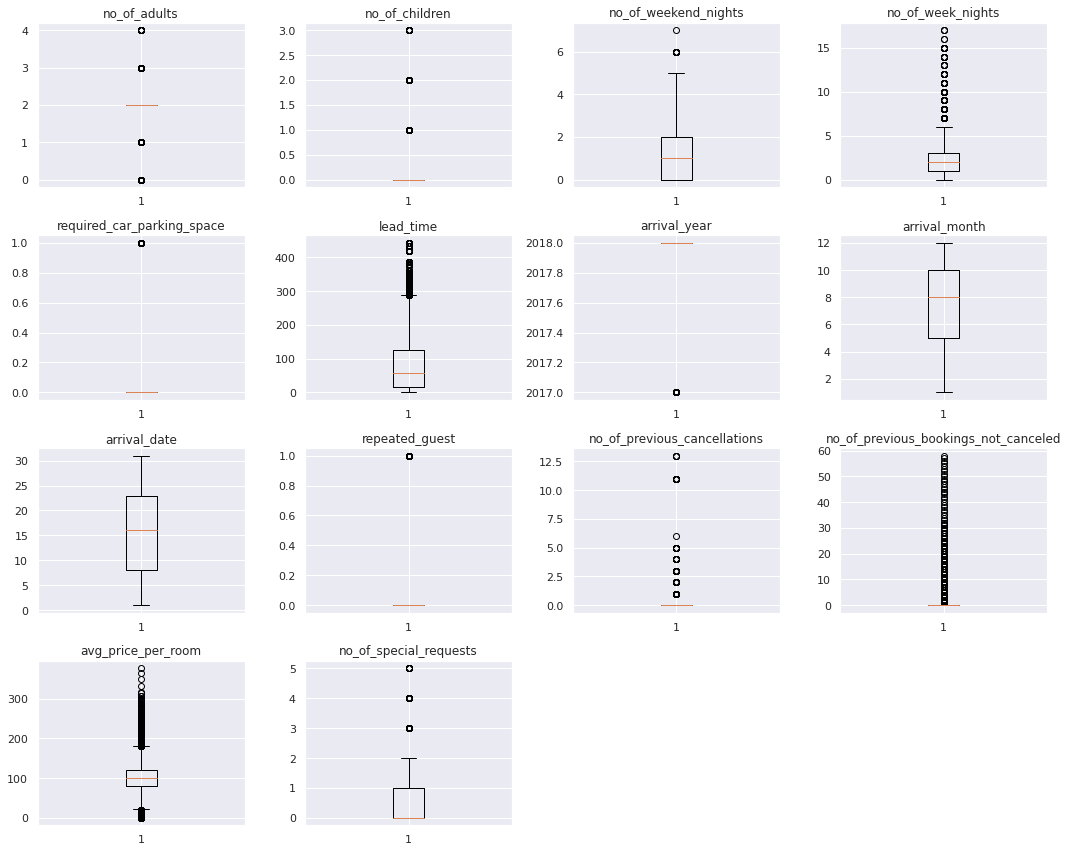

In [ ]:
# Checking for outliers using boxplot 
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# Dropping the Booking Status 
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()



*   There are many outliers in no_of_week_nights, lead_time, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room.



In [ ]:
# Dropping Booking Status for modeling
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


* We had seen that around ~67% of observations belongs to class 0 (Not Canceled) and ~32% observations belongs to class 1 (Canceled), and this is preserved in the train and test sets.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Logistic Regression model

In [ ]:
# specifying the independent and dependent variables
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 27 Aug 2022   Pseudo R-squ.:                  0.3292
Time:                        00:14:02   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

- Negative values of the coefficient show that the probability of booking status decreases with the increase of the corresponding attribute value.
 
- Positive values of the coefficient show that the probability of booking status  increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285



- The f1_score of the model is 0.68285

- There might be multicollinearity which will affect the p-values, so we will treat for that

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# Checking VIF for multicollinearity 
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


In [ ]:
# Dropping high p-value variables with a loop 

cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 27 Aug 2022   Pseudo R-squ.:                  0.3282
Time:                        00:14:06   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.



*   There is now no feature that has a p-value greater than 0.05 now.


In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


- The model's f1_score is 0.68174

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724




*   Holding all else constant a 1 unit change in the arrival month, will decrease the booking status by 4.16%. 
* The odds of booking status changing is based on no_of_previous_cancellations is 1.25 times or 25.7%.




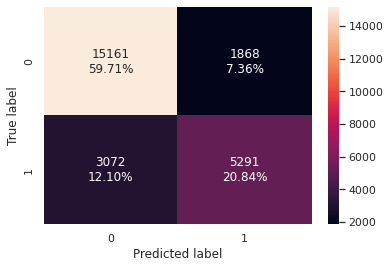

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


- The model's f1_score is 0.68174

## Model performance evaluation

### AUC-ROC curve

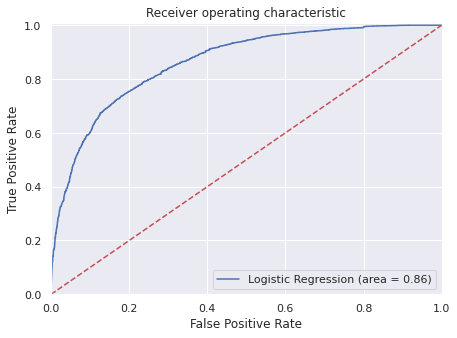

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.



### Optimal threshold using AUC-ROC Curve for Training

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558707859


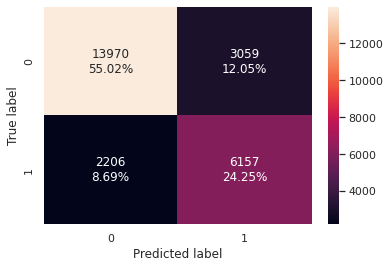

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049




*   The accuracy and percision of this model has decreased; however, recall and F1 has increased.


### Precision-Recall Curve

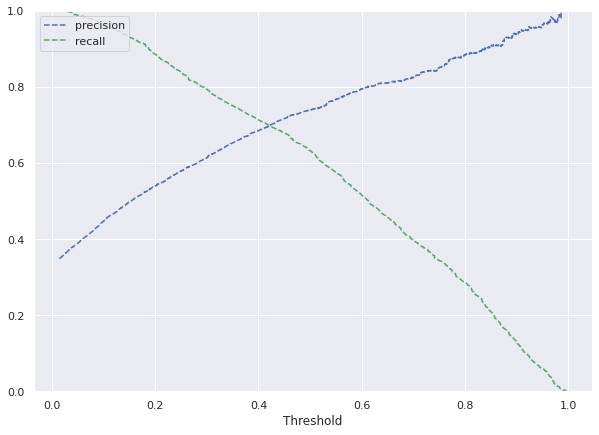

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Model performance on training set

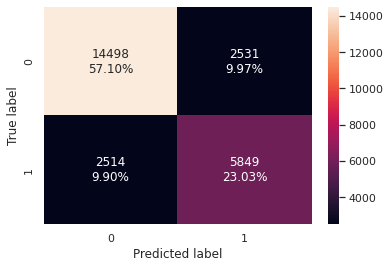

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868




*   Accuracy and precision has increased whereas recall and F1 has decreased.



#### Model performance on test set

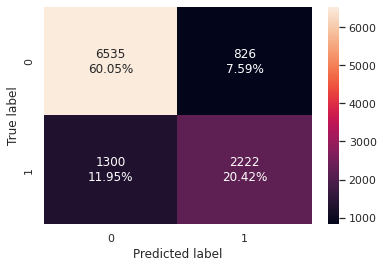

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)

print("Test performance:")
log_reg_model_test_perf 

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641




*   Accuracy is 0.80 and precision is 0.729 with F1 at 0.676


### Optimal threshold using AUC-ROC Curve for Testing

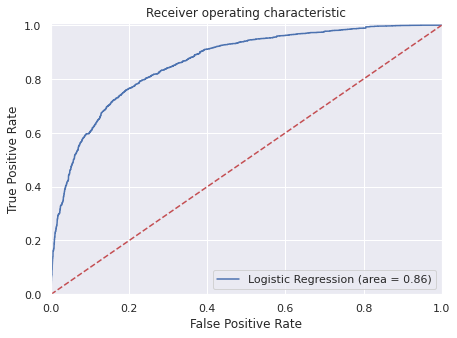

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on testing set.


In [ ]:
# setting the threshold
optimal_threshold_auc_roc = .37

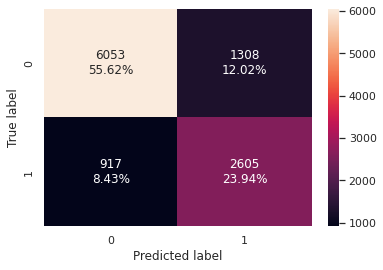

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold = optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


* Accuracy and Precision have both decreased; however, recall and F1 has increased

In [ ]:
# setting the threshold
optimal_threshold_curve = .42

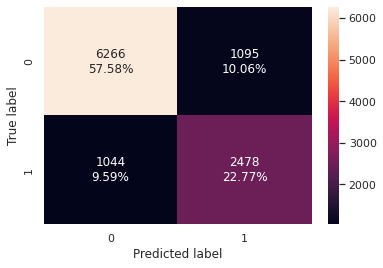

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold = optimal_threshold_curve)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852




*   Both accuracy and precision have increased whereas recall and F1 have decreased.


## Final Model Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852




* Almost all the three models are performing well on both training and test data without the problem of overfitting.
* The model with a threshold (0.37) is giving the best F1 score. Therefore it can be selected as the final model.


## Building a Decision Tree model

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of Test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


* We had seen that around ~67% of observations belongs to class 0 (Not Canceled) and ~32% observations belongs to class 1 (Canceled), and this is preserved in the train and test sets

In [ ]:
model_decisiontree = DecisionTreeClassifier(random_state=1)
model_decisiontree .fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking model performance on training set

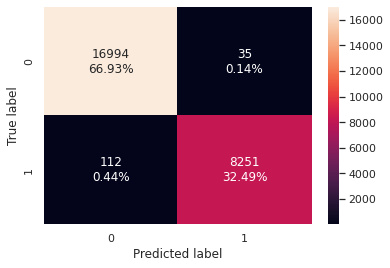

In [ ]:
confusion_matrix_sklearn(model_decisiontree, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model_decisiontree, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


- The model's f1_score is 0.99.

### Checking model performance on testing set

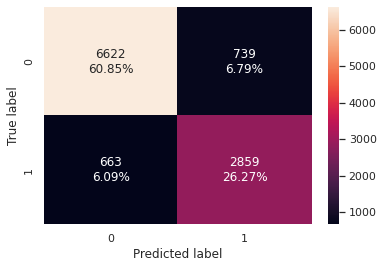

In [ ]:
confusion_matrix_sklearn(model_decisiontree, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model_decisiontree, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


- The model's f1_score is 0.80

## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

### Performance on the Training Set

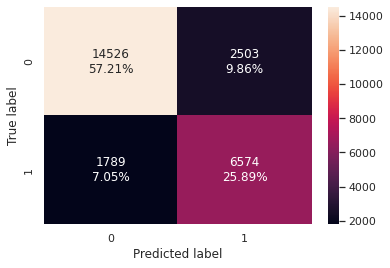

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


- The model's f1_score is 0.75.

### Performance on the Testing Set

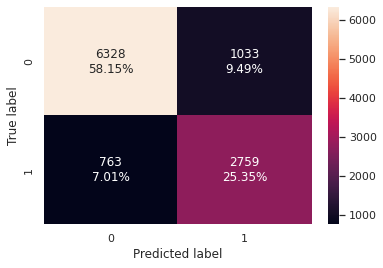

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


* The model is giving a generalized result because the recall scores are around 0.78 which is showing that the model is able to generalize the unseen data.

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

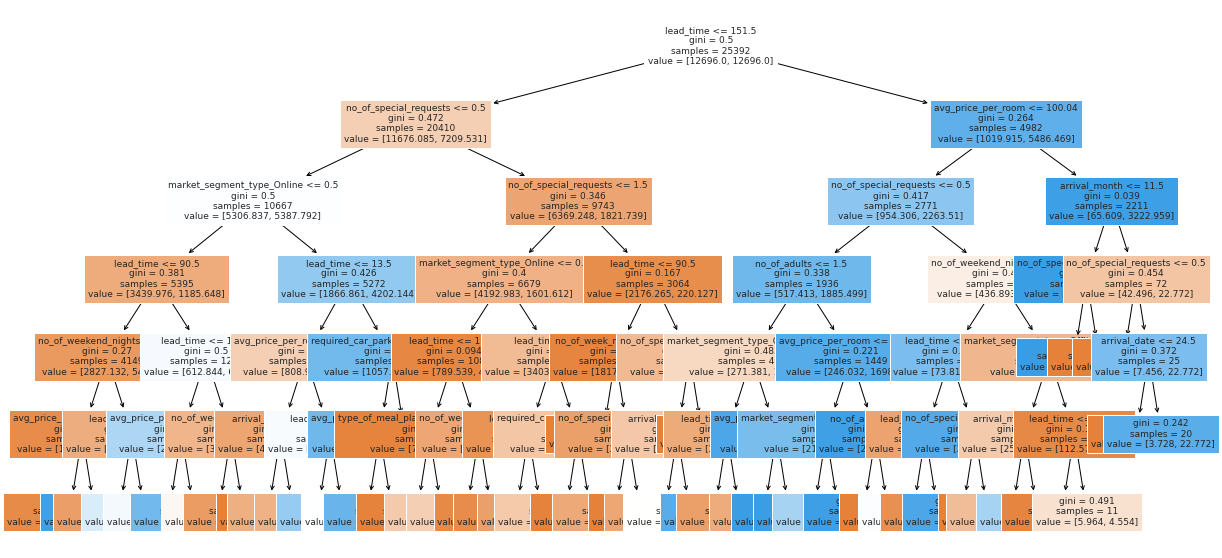

In [ ]:
# Graphing the decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

* If the lead_time is less than or equal to 151.5, the market_segment_type_online is less than or equal to 0.5, lead_time is less than or equal to 90.5 etc, then the booking status is most likely to be canceled.


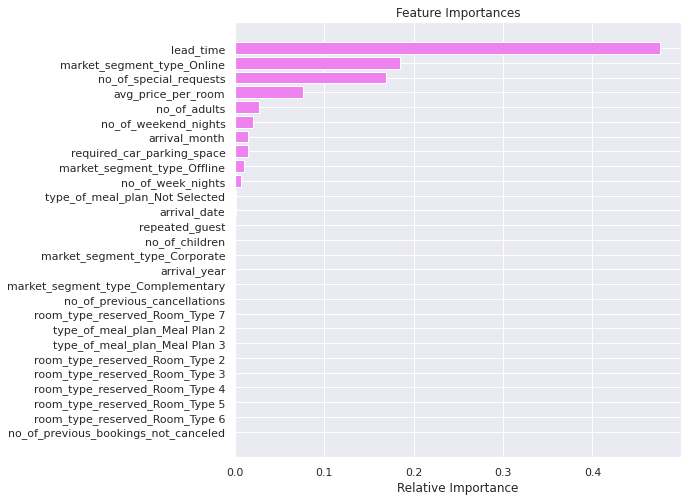

In [ ]:
# Important Features within Tree

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


*   In the pre tuned decision tree, lead_time, market_segment_type_online, no_of_special_requests, avg_price_per_room, no_of_adults, jno_of_weekend_nights.


In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


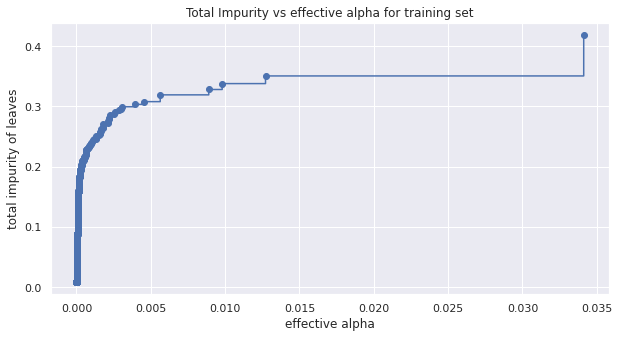

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


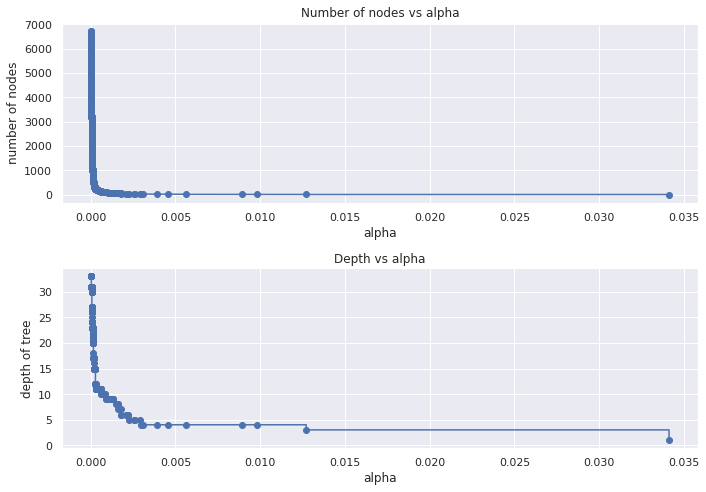

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs Alpha on Training and Testing Sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

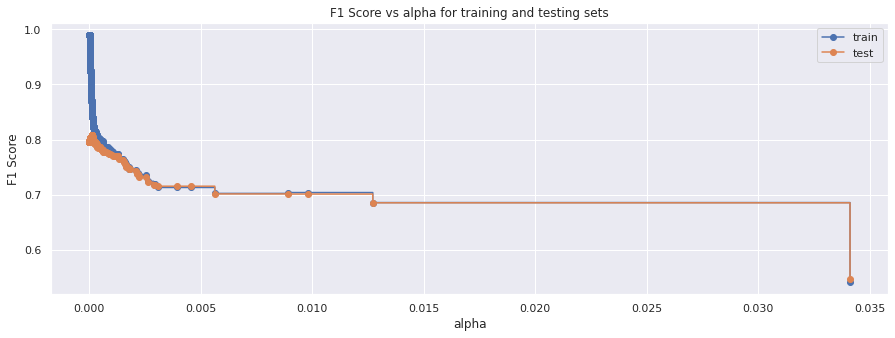

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


### Performance on Training

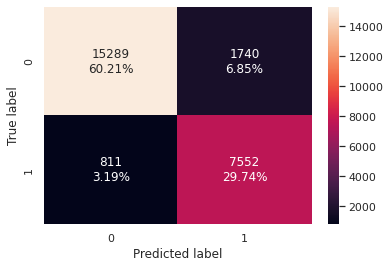

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


### Performance on Testing

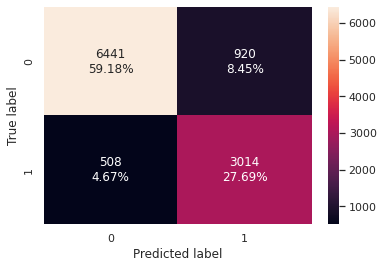

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


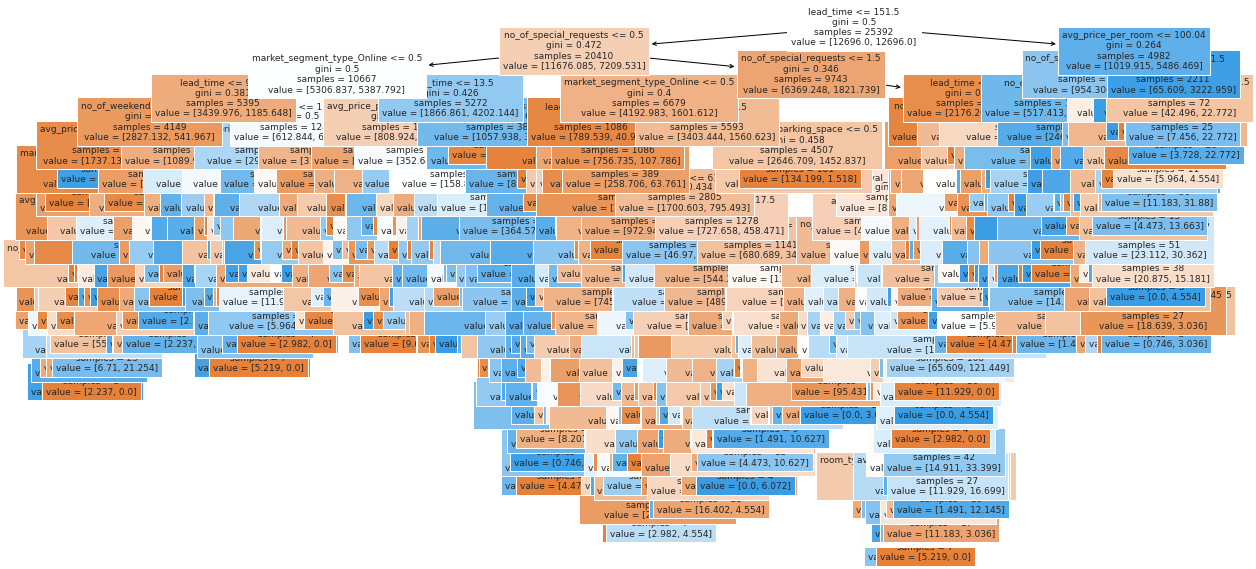

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

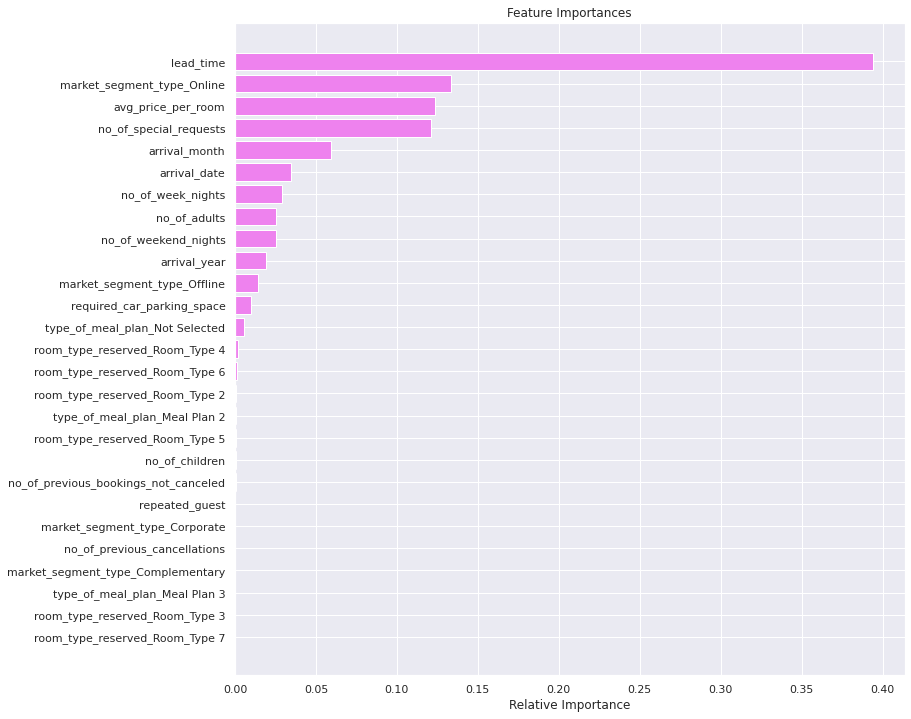

In [ ]:
# Important Features within Tree
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


*   In the pruned decision tree, lead_time,  market_segment_type_online, avg_price_per_room, no_of_special_requests, arrival_month, arrival_date, no_of_week_nights, no_of_adults, no_of_weekend_nights.



## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89954
Recall,0.98661,0.78608,0.90303
Precision,0.99578,0.72425,0.81274
F1,0.99117,0.75390,0.85551


In [ ]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.86879
Recall,0.81175,0.78336,0.85576
Precision,0.79461,0.72758,0.76614
F1,0.80309,0.75444,0.80848




*   The post pruned decision tree is the best modle as it is giving the higher precision score on the train and test data in the pre-pruned tree.



## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?



*   The model can be used to predict if a user will or will not cancel a hotel booking and can correctly identify this by 85.57%. 

*  Lead_time,  market_segment_type_online, and avg_price_per_room were the most important variables in predicting booking status.

* To discourage guest from cancelling, the hotel could implement less forgiving rate policies. So only have a 7 day free cancellation after booking instead of up to 24 hours before check-in. 

* Have a specific cancellation policy for group bookings such as a legal contract to be signed ahead of time.

* During peak months from August - October be less flexible with cancellations and overbooking.

